In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset, DataLoader
import torch

In [ ]:
# Load the data
df = pd.read_csv('SMSSpamCollection', sep='\t', names=["label", "message"])


In [ ]:

df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.shape

(5572, 2)

In [ ]:
X=list(df['message'])

In [ ]:
y=list(df['label'])

In [ ]:
y

['ham',
 'ham',
 'spam',
 'ham',
 'ham',
 'spam',
 'ham',
 'ham',
 'spam',
 'spam',
 'ham',
 'spam',
 'spam',
 'ham',
 'ham',
 'spam',
 'ham',
 'ham',
 'ham',
 'spam',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'spam',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'spam',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'spam',
 'ham',
 'spam',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'spam',
 'ham',
 'spam',
 'spam',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'spam',
 'ham',
 'spam',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'spam',
 'ham',
 'ham',
 'spam',
 'ham',
 'ham',
 'spam',
 'spam',
 'h

In [ ]:
# Prepare the data
X = df['message'].tolist()
y = pd.get_dummies(df['label'], drop_first=True)['spam'].tolist()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
# Custom dataset class
class CustomDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            return_token_type_ids=False,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt',
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }


In [ ]:
!pip install transformers

In [ ]:
from transformers import DistilBertTokenizerFast
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

In [ ]:
train_encodings = tokenizer(X_train, truncation=True, padding=True)
test_encodings = tokenizer(X_test, truncation=True, padding=True)

In [ ]:
# Create datasets
train_dataset = CustomDataset(X_train, y_train, tokenizer)
eval_dataset = CustomDataset(X_test, y_test, tokenizer)

In [ ]:
y_train

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 Fals

In [ ]:
import tensorflow as tf

train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    y_train
))

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    y_test
))

In [ ]:
train_dataset

<_TensorSliceDataset element_spec={'input_ids': TensorSpec(shape=(), dtype=tf.float32, name=None), 'attention_mask': TensorSpec(shape=(), dtype=tf.float32, name=None), 'labels': TensorSpec(shape=(), dtype=tf.float32, name=None)}>

In [ ]:
import transformers
print(transformers.__version__)


4.43.3


In [ ]:
!pip install --upgrade transformers


#TRAINING WITH HUGGING FACE MODEL

In [ ]:
# Model and training setup
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased")

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=1,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    warmup_steps=100,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset
)

# Train the model
trainer.train()

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
10,0.671300
20,0.600100
30,0.499400
40,0.295600
50,0.129500
60,0.054300
70,0.066900
80,0.084300
90,0.005000
100,0.081700


TrainOutput(global_step=558, training_loss=0.10143145158933642, metrics={'train_runtime': 223.3551, 'train_samples_per_second': 19.955, 'train_steps_per_second': 2.498, 'total_flos': 590407195809792.0, 'train_loss': 0.10143145158933642, 'epoch': 1.0})

In [ ]:
# Evaluate the model
eval_result = trainer.evaluate()
print(f"Evaluation results: {eval_result}")


Evaluation results: {'eval_loss': 0.03726765885949135, 'eval_runtime': 19.7445, 'eval_samples_per_second': 56.471, 'eval_steps_per_second': 3.545, 'epoch': 1.0}


In [ ]:
# Predict with the model
predictions = trainer.predict(eval_dataset)
print(f"Predictions: {predictions.predictions}")

Predictions: [[ 3.074003  -3.551169 ]
 [-3.0598717  3.0795076]
 [ 3.1598861 -3.5759351]
 ...
 [ 3.0941916 -3.5041616]
 [-3.1117244  3.1414917]
 [ 3.189645  -3.6810017]]


In [ ]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

Evaluation results: {'eval_loss': 0.03726765885949135, 'eval_runtime': 19.4708, 'eval_samples_per_second': 57.265, 'eval_steps_per_second': 3.595, 'epoch': 1.0}
Confusion Matrix:
[[948   7]
 [  3 157]]
Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.99      0.99       955
        True       0.96      0.98      0.97       160

    accuracy                           0.99      1115
   macro avg       0.98      0.99      0.98      1115
weighted avg       0.99      0.99      0.99      1115



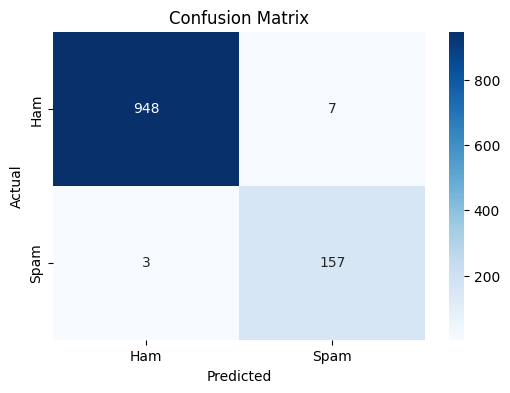

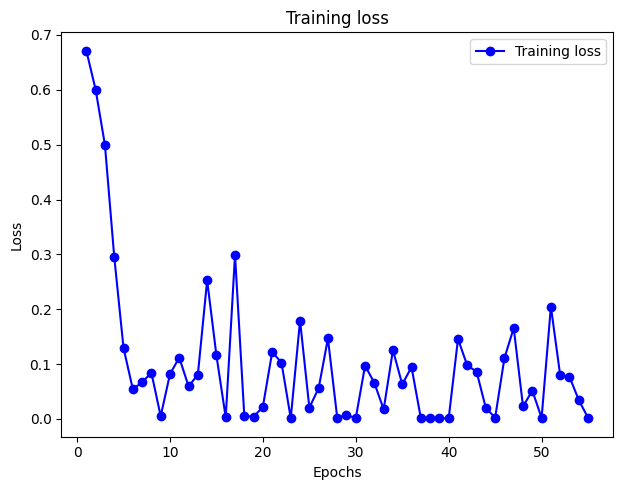

In [ ]:
# Evaluate the model
eval_result = trainer.evaluate()
print(f"Evaluation results: {eval_result}")

# Predict with the model
predictions = trainer.predict(eval_dataset)
y_pred = predictions.predictions.argmax(axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

# Classification report
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot training loss and accuracy
logs = trainer.state.log_history
epochs = range(1, len([x for x in logs if 'loss' in x]) + 1)
train_loss = [x['loss'] for x in logs if 'loss' in x]
train_accuracy = [x['eval_accuracy'] for x in logs if 'eval_accuracy' in x]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()



plt.tight_layout()
plt.show()


In [ ]:
# Save the model
trainer.save_model('senti_model')